### Installation

In [1]:
#!pip install tensorflow
#!pip install tqdm
#!pip install  nltk

### Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import string
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


2025-01-16 13:43:00.618506: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 13:43:00.619994: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 13:43:00.623207: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 13:43:00.631978: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737034980.646362  113331 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737034980.65

### Chargement du dataset

In [3]:
data_path = "datas/spam_Emails_data.csv" 
data = pd.read_csv(data_path)
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


#### Visualisation

In [ ]:
data.info()
data = data.dropna()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


label    0
text     0
dtype: int64

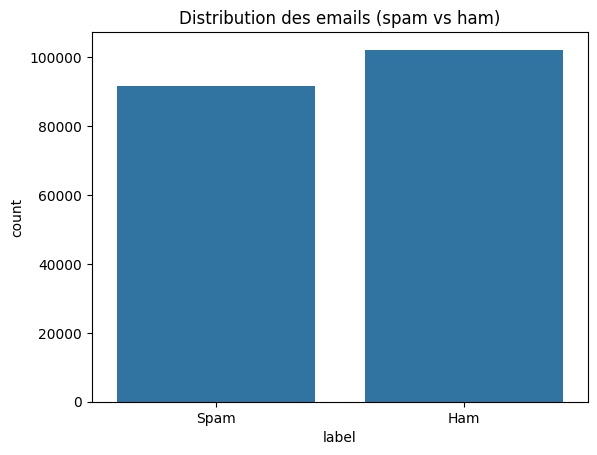

In [5]:
sns.countplot(x="label", data=data)
plt.title("Distribution des emails (spam vs ham)")
plt.show()

#### Prétraitement

<Axes: xlabel='label', ylabel='count'>

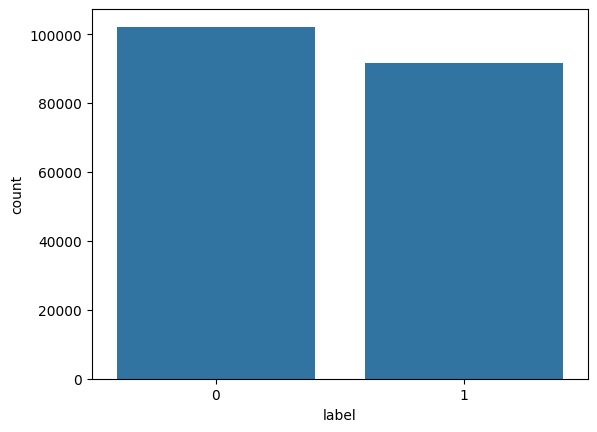

In [6]:
m_label = {
    'Spam': 1,
    'Ham': 0,
}

data['label'] = data['label'].str.strip().str.capitalize()

data['label'] = data['label'].map(m_label)
sns.countplot(data=data , x='label')

In [7]:
tqdm.pandas()
exclude=string.punctuation
exclude
# displ ['text'][0]
data['text'][0]

"viiiiiiagraaaa\nonly for the ones that want to make her scream .\nprodigy scrawny crow define upgrade spongy balboa dither moiseyev schumann variegate ponce bernie cox angeles impassive circulate impend miscellany chalkboard whizzing pend armenian cutlet waring makeshift fletch dispel crest cadet dovetail rapprochement gerry bayreuth selectman wilmington tuttle alchemy itt bullyboy .\ncaan ' t do . . .\n"

In [8]:
#rmv punctuation function 
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

#rmv stop words function
def remove_stopword(text):
    filtered_txt=' '.join(word for word in text.split() if word.lower() not in stopword)
    return filtered_txt

In [9]:
#get english stop words
nltk.download('stopwords')
stopword=stopwords.words("english")
stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
data['text']=data['text'].progress_apply(lambda x: remove_punc(x))
data['text']=data['text'].progress_apply(lambda x:remove_stopword(x))
data.head()

100%|██████████| 193850/193850 [01:14<00:00, 2617.52it/s]


,label,text
0,1,viiiiiiagraaaa ones want make scream prodigy s...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom ne eds escapenumber ch n b e th n f ...
3,1,start increasing odds success live sexually he...
4,0,author jra date escapenumber escapenumber esca...


In [11]:
#tokenize text
data['tokenize']=data['text'].progress_apply(word_tokenize)
data.head()

100%|██████████| 193850/193850 [01:45<00:00, 1839.20it/s]


,label,text,tokenize
0,1,viiiiiiagraaaa ones want make scream prodigy s...,"[viiiiiiagraaaa, ones, want, make, scream, pro..."
1,0,got ice thought look az original message ice o...,"[got, ice, thought, look, az, original, messag..."
2,1,yo ur wom ne eds escapenumber ch n b e th n f ...,"[yo, ur, wom, ne, eds, escapenumber, ch, n, b,..."
3,1,start increasing odds success live sexually he...,"[start, increasing, odds, success, live, sexua..."
4,0,author jra date escapenumber escapenumber esca...,"[author, jra, date, escapenumber, escapenumber..."


In [12]:
#vectorize text
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_sparse = vectorizer.fit_transform(data['text'])

# target 
y = data['label']

# split data
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")

Training data: (155080, 5000)
Test data: (38770, 5000)


#### Création du modèle MLP

In [13]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 13:46:37.242682: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,633 (2.49 MB)

 Trainable params: 653,121 (2.49 MB)

 Non-trainable params: 512 (2.00 KB)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.9307 - loss: 0.1755 - val_accuracy: 0.9768 - val_loss: 0.0650 - learning_rate: 0.0010
Epoch 2/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.9778 - loss: 0.0686 - val_accuracy: 0.9825 - val_loss: 0.0520 - learning_rate: 0.0010
Epoch 3/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9842 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 4/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9891 - loss: 0.0359 - val_accuracy: 0.9847 - val_loss: 0.0523 - learning_rate: 0.0010
Epoch 5/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9854 - val_loss: 0.0503 - learning_rate: 0.0010
Epoch 6/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9924 - loss: 0.0260 - val_accuracy: 0.9858 - val_loss: 0.0502 - learning_rate: 0.0010
Epoch 7/50
3877/3877 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9

In [15]:
# evaluation 
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1212/1212 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0492
Test Loss: 0.0513
Test Accuracy: 0.9838


In [16]:
#  predictions
y_pred = model.predict(X_test)

1212/1212 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [17]:
#report
y_pred_binary = (y_pred > 0.5).astype(int)
report = classification_report(y_test, y_pred_binary, target_names=['Ham', 'Spam'])

print(report)

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:\n")
print(conf_matrix)

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.98     20317
        Spam       0.98      0.98      0.98     18453

    accuracy                           0.98     38770
   macro avg       0.98      0.98      0.98     38770
weighted avg       0.98      0.98      0.98     38770


Confusion Matrix:

[[19965   352]
 [  277 18176]]


#### Visualisation des performances

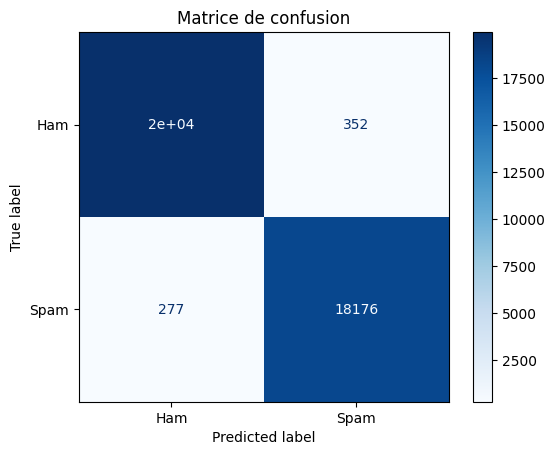

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_binary, display_labels=['Ham', 'Spam'], cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

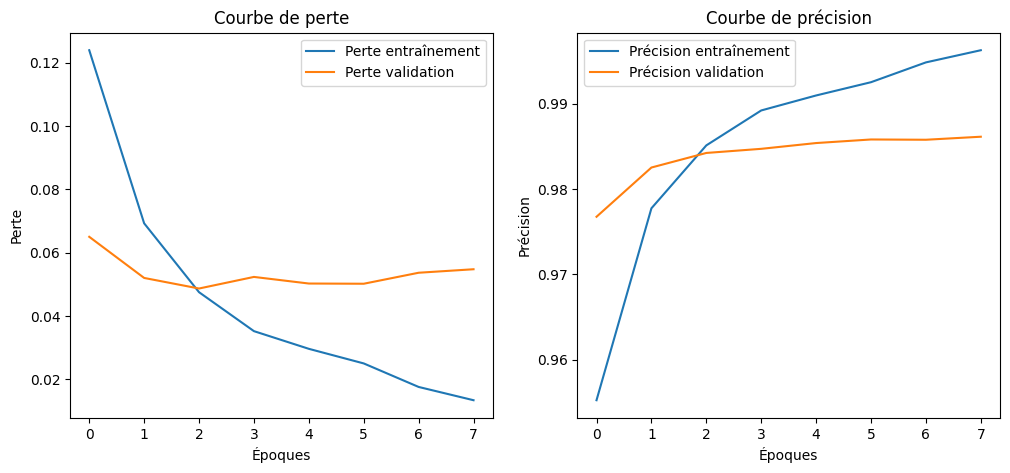

In [19]:
plt.figure(figsize=(12, 5))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title("Courbe de perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

# Précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title("Courbe de précision")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()

plt.show()